car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
               Model      R2 Score           MSE           MAE
0  Linear Regression -3.179554e+21  2.510068e+29  2.386524e+14
1      Decision Tree  8.665804e-01  1.053268e+07  2.098309e+03
2      Random Forest  9.537393e-01  3.652007e+06  1.378893e+03
3  Gradient Boosting  9.315610e-01  5.402849e+06  1.685616e+03
4                SVR -1.017173e-01  8.697400e+07  5.705061e+03


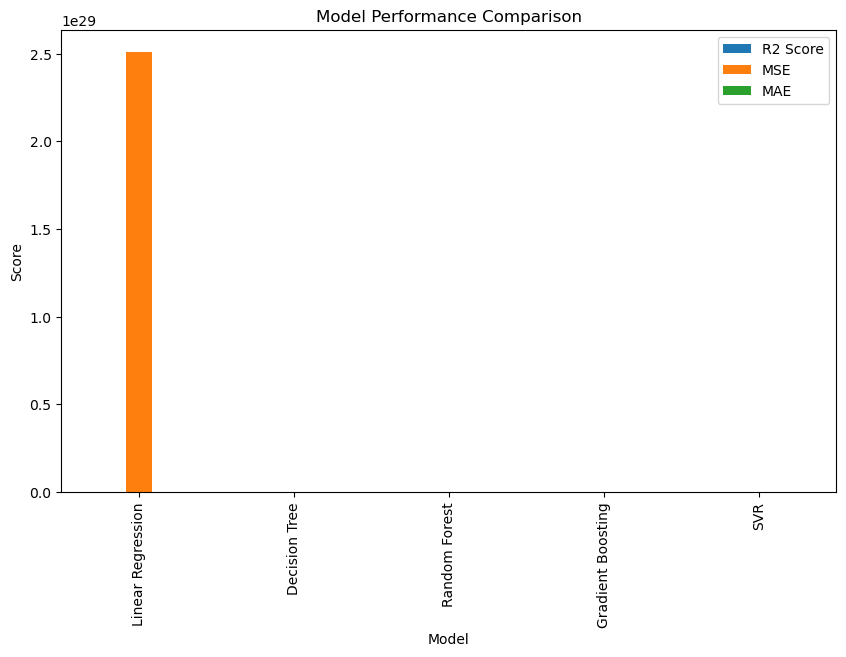

The best performing model is: Random Forest


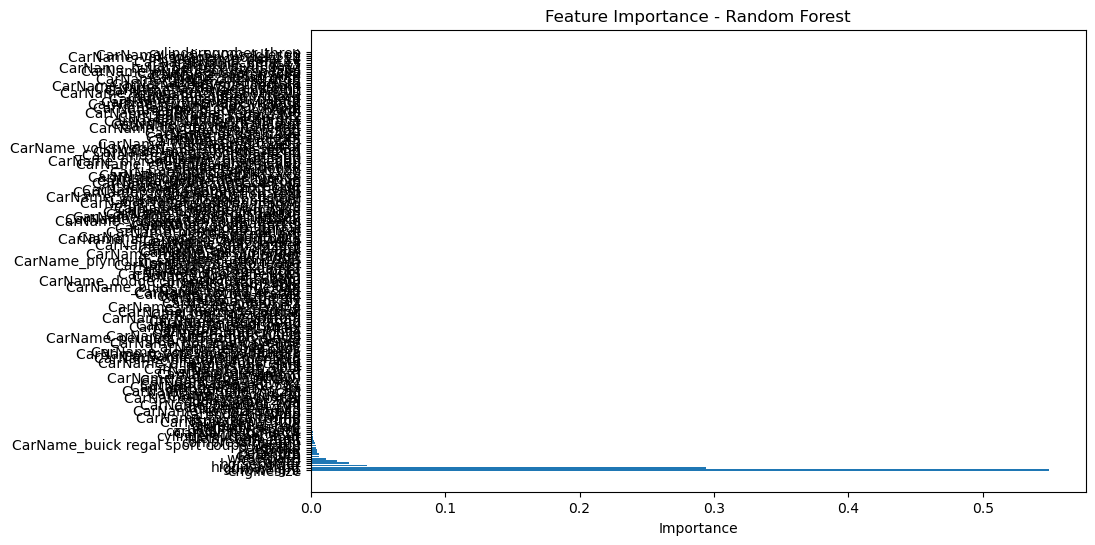

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest R2: 0.9544587165610479
Tuned Random Forest MSE: 3595212.0306910495
Tuned Random Forest MAE: 1360.8609880207862


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Loading and Preprocessing Data

# Load the dataset
url = "https://drive.google.com/uc?export=download&id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP"  # Direct download link
df = pd.read_csv(url)

# Display the first few rows to understand the structure
df.head()

# Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.dropna()  # Dropping rows with missing values

# Convert categorical variables to numerical using encoding
df = pd.get_dummies(df, drop_first=True)

# Feature-Target Split
X = df.drop('price', axis=1)  # Independent variables
y = df['price']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Model Implementation

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Decision Tree Regressor Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# Random Forest Regressor Model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Gradient Boosting Regressor Model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

# Support Vector Regressor Model
svr = SVR()
svr.fit(X_train, y_train)
svr_preds = svr.predict(X_test)

# 3. Model Evaluation

# Create a DataFrame to compare model performance
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']
r2_scores = [r2_score(y_test, lr_preds), r2_score(y_test, dt_preds), r2_score(y_test, rf_preds), r2_score(y_test, gb_preds), r2_score(y_test, svr_preds)]
mse_scores = [mean_squared_error(y_test, lr_preds), mean_squared_error(y_test, dt_preds), mean_squared_error(y_test, rf_preds), mean_squared_error(y_test, gb_preds), mean_squared_error(y_test, svr_preds)]
mae_scores = [mean_absolute_error(y_test, lr_preds), mean_absolute_error(y_test, dt_preds), mean_absolute_error(y_test, rf_preds), mean_absolute_error(y_test, gb_preds), mean_absolute_error(y_test, svr_preds)]

performance_df = pd.DataFrame({
    'Model': models,
    'R2 Score': r2_scores,
    'MSE': mse_scores,
    'MAE': mae_scores
})

print(performance_df)

# Visualizing the model performance
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

# Identify the best performing model (based on R2 score)
best_model_index = np.argmax(r2_scores)
print(f"The best performing model is: {models[best_model_index]}")

# 4. Feature Importance Analysis (for tree-based models)
# Random Forest feature importance
rf_importances = rf.feature_importances_
sorted_idx_rf = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx_rf], rf_importances[sorted_idx_rf])
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.show()

# 5. Hyperparameter Tuning (for Random Forest Regressor)

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Evaluating the tuned Random Forest model
best_rf_model = grid_search_rf.best_estimator_
best_rf_preds = best_rf_model.predict(X_test)

# Model Evaluation of tuned model
tuned_r2 = r2_score(y_test, best_rf_preds)
tuned_mse = mean_squared_error(y_test, best_rf_preds)
tuned_mae = mean_absolute_error(y_test, best_rf_preds)

print(f"Tuned Random Forest R2: {tuned_r2}")
print(f"Tuned Random Forest MSE: {tuned_mse}")
print(f"Tuned Random Forest MAE: {tuned_mae}")
